In [59]:
%matplotlib notebook

import cv2
import scipy
import scipy.ndimage
import numpy as np
import matplotlib.pyplot as plt

#### Linear operator
An operator $H$ (or system) is **linear** if two properties hold ($f1$ and $f2$ are some functions, $a$ is
a constant):
- Additivity:
    * $H(f1 + f2) = H(f1) + H(f2)$
    
- Multiplicative scaling (Homogeneity of degree 1):
    * $H(a. f1) = a.H(f1)$
    
You can apply linear operators separately to the image and it will give the same result as if you combined
the operators and then applied it to the image.

<br></br>

#### Correlation vs Convolution
- **Cross-correlation:**
Notation for cc operator -- $G = H \bigoplus F$
$$G[i,j] = \sum_{u=-k}^k \sum_{v=-k}^k H[u,v]F[i + u, j + v]$$

- **Convolution:** 
Flips in both dimensions.
Notation for conv. operator -- $G = H ^* F$

$$G[i,j] = \sum_{u=-k}^k \sum_{v=-k}^k H[u,v]F[i - u, j - v]$$

<br></br>

#### Shift invariant:
Operator behaves the same everywhere, i.e. the value of the output depends on the pattern in the image
neighborhood, not the position of the neighborhood.

<br></br>


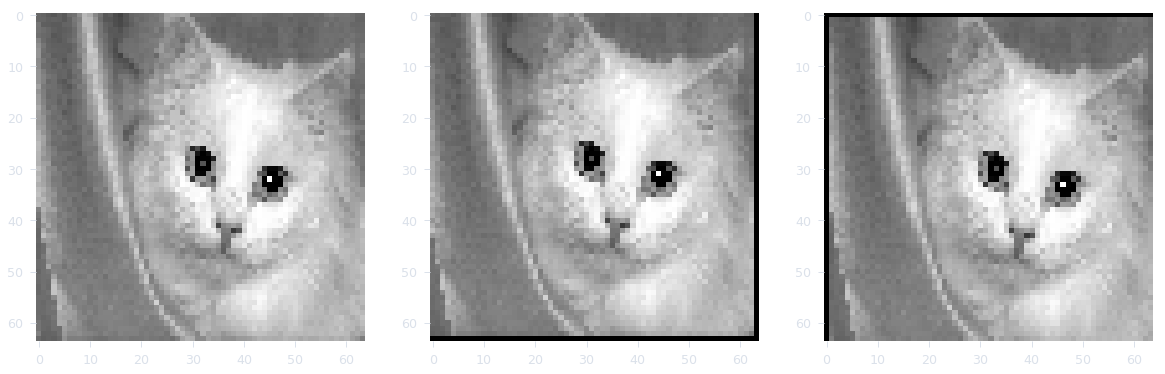

In [60]:
im = scipy.misc.imread('data/cat.jpg', 'L')
dimension = 64, 64
im = cv2.resize(im, dimension, interpolation = cv2.INTER_CUBIC)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

# impulse kernel -- 
kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])
ax[0].imshow(im, 'gray')

kernel = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 5]
])
ax[1].imshow(scipy.ndimage.correlate(im, kernel, mode='constant'), 'gray')
ax[2].imshow(scipy.ndimage.convolve(im, kernel, mode='constant'), 'gray')

plt.show()